# Comentarios sobre SVD.
El SVD es fundamental por varias razones.

1. Muchas veces invertir matrices puede ser dificil, entonces el SVD muestra una forma de invertir matrices facil. La del centro $\Sigma$ es diagonal, y las otras dos son ortogonales cuyas inversas son las adjuntas.
Matrices que no tengan inversas se pueden "invertir" con el SVD. Usando la **pseudoinversa** (al final de la clase de hoy).

2. Los valores singulares dan cunenta de que **dimensiones** importan y cuales no. Tus datos pueden vivir en un espacio de 1 millon de dimensiones, pero de pronto la mayoria son superfluas. Ejemplo. Considere una linea recta en un espacio de $\mathbb{R}^{1000000}$. Dado dos vectores $P, Q$, y un parametro real $t$
`
$$L = P + t(Q-P) $$
donde $t \in (-\infty, \infty)$.
Esto para explicar la reduccion de dimensionalidad. Al final del curso vermos PCA=Principal Component Analysis: Para encontrar las dimensiones principales.

Por ejmplo tienes 13 parametros, hay 13 dimensiones, pero con PCA puedes alumbrar los 2 principales y graficar unos datos 13-dimensionales en plot XY.

3. Piense en la fisica. Elasticidad. Piense en lo que hace la descomposition de $A$ a un cuerpo con puntos $x$.

    *  $$z = A x = U \Sigma V^* x$$

    Primero el punto $x$ es operado por $ V^{*} $  pero como $V^*$ es ortogonal el punto
se rota o se refleja, pero ni se estira ni se encoje.  $V^* x$.
    * Luego aplica la matriz $\Sigma$, $\Sigma V^* x$.
    Toma el punto rotado (o reflejado) lo estira y o encoje en cada una de las dimensiones.
    * Por ultimo despues de sufri esta deformacion en las distintas dimensiones el cuerpo (punto) rota o se refleja de acuerdo a $U$, tenemos el resultado de $z = U \Sigma V^* x$.  

4. Sirve para definir el numero de condicion

**Definicion 2.3.1**: (condition number). Definimos el **numero de condicion** de la matriz $A$ como el cociente entre al valo singular mas gande y el mas pequenho

$$ \kappa = \frac{\sigma_1}{\sigma_n} $$
Que pasa si $\sigma_n=0$? pues $\kappa \infty$. Es decir $A$ no tiene inversa.
Lo "ideal" es que $\kappa = 1$.
Este concepto es importante por que aunque halla matrices invertibles, el numero $\kappa \gg 1$, y esto indica **inestabilidad** de $Ax=b$, pequenhos cambios en $b$ producen grandes cambios en $x$.  Obviamente $\kappa \ge 1$.
A los sistemas con $\kappa$ pequenho se les llaman **well posed** (bien puesto), y si $\kappa \gg 1$, se llama **ill posed** (mal puesto).

## El cociente de Rayleigh (the Rayleigh quotient).
Se va a usar este concepto en el capitulo 4

**Definicion 2.3.2**( Cociente de Rayleigh): Asuma que $A$ es autoadjunta. El cociente de Rayleigh de $A$ con respecto al vector $x$ se define por la ecuacion

$$R(A, x) = \frac{x^* A x}{x^* x} = \frac{\langle x, A x \rangle }{\| x \|^2} = \frac{\langle A x, x \rangle }{ \| x \|^2} $$

Ahora, llamando $u = \frac{x}{\| x\|}$ se puede escribir

$$R(A, x) = \frac{x^*}{\| x \| } A \frac{x}{\| x \|} = u^* A u $$
donde $u$ es unitario.

**Teorema 2.3.2** (cociente de Rayleigh): El autovalor mas grande de una matriz autoadjunta $n \times n$ , $A$ es el maximo de la grafica del cociente de Rayliegh sobre todos los vectores unitarios $\mathbb{C}^n$.

**Prueba**: Asuma $u \in \mathbb{C}^n$ como un vector unitario. Cada vector se puede escribir como una combianacion lineal de los vectores base (algebra lineal basica). Del teorema de la descomposicion espectral sabemos que $A$ tiene $n$ vectores mutualmente ortonormales $ \{ u_1, u_2, \cdots, u_n \}$,
forman una base para $\mathbb{C}^n$.

Entonces

$$u = \sum_{i=1}^n \alpha_i u_i $$
donde $\sum_{i=1}^n | \alpha_i |^2 = 1$

$$R(A, u) = u^* A u = \sum_{i=1}^n \sum_{j=1}^n \overline{\alpha_i} \alpha_j   u_i^* A u_j  \tag{1} $$
Usando la distributiva.


Como cada $u_i$ es autovector de $A$ con autovalor $\lambda_i$

$$u_i^* A u_j = u_i^* ( \lambda_j u_j) =\lambda_j u_j^* u_i = \lambda \delta_{ij} $$
insertamos este resulado en la ecuacion (1)

$$R(A, u) = \sum_{i=1}^n \sum_{j=1}^n \overline{\alpha_i} \alpha_j   u_i^* A u_j = \sum_{i=1}^n \sum_{j=1}^n \overline{\alpha_i} \alpha_j \lambda \delta_{ij}  =  \sum_{i=1}^n \overline{\alpha_i} \alpha_i \lambda_i  = \sum_{i=1}^n | \alpha_i |^2 \lambda_i $$

Ojo con el siguiente argumento (en las notas de clase hay otro argumento adicional).
Vemos que $R(A, u)$ es el **promedio ponderado** de los autovalores $\lambda_i$.  Entonces los $\alpha_i$ pueden ser arbitrarios, pero vamos asumir sin perdida de generalidad que $\lambda_1$ es el mayor de todos autovalores,
Entonces el maximo $R(A,u)$ se da cuando el vector $\alpha = e_1=(1, 0, 0, \cdots, 0)$.

De esta forma

$R(A, e_1) = \lambda_1 \le R(A, u)$

y que tal si $\lambda_2$ es el mas grande.
A bueno entonces $u=e_2=(0,1,0, \cdots, 0)$ y

$R(A, e_2) = \lambda_2 \le R(A, u)$

El segundo argumento es que como $\lambda_1 \ge \lambda_i$, $i=2,3, \cdots, n$
entonces

$$R(A, u)= \sum | u_i |^2 \lambda_i \le \sum | u_i |^2 \lambda_1  = \lambda_1 \sum |u_i|^2 = \lambda_1   $$

Esto implica que $\lambda_1$ es una **cota superior** de $R(A,u)$.
Basta exhibir un $u$ tal que $R(A, u) = \lambda_1$ para que se concluya el resultado.  Este $u$ es $e_1 = (1, 0, 0, \cdots, 0)$
con este $u$ , $R(A, u) = \lambda_1$

**Thorema 2.3.3**: (Cholesky decomposition. Nota, no lo usamos en el curso): Si $A$ es positiva definida (self adjoint) entonces existe (triangular inferior) $L$ tal que
$$A = L L^* $$
Ahora si $L$ es autoadjunta, pues entonces $L$ es diagonal
y $A=L^2$ o sea que $L$ es la **raiz cuadrada de A**.

# Calculo Matricial
Vamos a necesitar entender el calculo matricial para resolver algunos de los problemas de ML.

**Definicion 2.5.1** (Derivada de una matriz): Sea $A=A(x)$ una matriz $m \times n$ con elementos $a_{ij}$ pero $x \in \mathbb{R}^p$. , $A=[a_{ij}]$, entonces

$$\frac{\partial A}{\partial x_k} =  \left [ \frac{\partial a_{ij}}{\partial x_k}  \right ] \quad , \quad k=1,2, \cdots, p \quad , i=1,2, \cdots, m  \quad , \quad j=1,2, \cdots, n$$
Ejemplo a mano alzada (tablero)
Tambien lo podemos llamar **gradiente**.

**Teorema 2.5.1**. La matriz de derivadas parciales de una matriz constantte $m \times n$ es 0.

**Prueba**: Si $A$ es una matriz que no es funcion de $x$ entonces

$$ \frac{\partial A}{\partial x_k} = \left [ \frac{\partial a_{ij}}{\partial x_k}   \right ] = [ 0] $$
En palabras: La derivada de una matriz constante es la matriz 0

**Teorema 2.5.2**: Si $A$ es constante $m \times n$, $x \in \mathbb{R}^n$, entonces

$$\nabla (Ax) = A \tag{2} $$
donde el gradiente es con respecto a $x$. Mas exactamente

$$ \frac{\partial (A x)}{\partial x_{k}} = \nabla_k (A x) = A_k $$
donde $A_k$ es la columna $k$ de $A$.

**Prueba**: Tomemos la componente  $i$  $y=Ax$.

$$y_i = \sum_{j=1}^n a_{ij} x_j $$
Entonces

$$\frac{\partial y_i}{\partial x_k} = \sum_{j=1}^n a_{ij} \frac{\partial x_j}{\partial x_k} = \sum_{j=1}^n a_{ij} \delta_{jk} = a_{ik}$$
como esta es la componente $i$, esto genera la columna $k$ de $A$ cuando
$i=1,2, \cdots, m$.

**Teorema 2.5.3**: Asuma $f(x), g(x)$ son funciones vectoriales del vector $x \in \mathbb{R}^n$ entonces

$$\frac{\partial \langle f, g \rangle }{\partial x_i}
= \left \langle \frac{\partial f}{\partial x_i} , g \right \rangle
+ \left \langle   f , \frac{\partial g}{\partial x} \right \rangle.
$$

**Prueba**:
Recuerde

$$ \langle f, g \rangle = \sum_{j=1}^n \overline{f_j}(x)  g_j(x) $$


\begin{eqnarray}
\frac{\partial \langle f, g \rangle }{\partial x_i}
&=& \sum_{j=1}^n \frac{\partial \overline{f_j}(x)}{\partial x_i} g_i(x)
+ \overline{f_j}(x) \frac{\partial g_j(x)}{\partial x} \\
&=&  \left \langle \frac{\partial f}{\partial x_i} , g \right \rangle
+ \left \langle   f , \frac{\partial g}{\partial x} \right \rangle.
\end{eqnarray}

En notacion de gradiente escribimos

$$\nabla \langle f, g \rangle = \langle \nabla f, g \rangle + \langle f, \nabla g \rangle  \tag{3} $$
Tenemos que tener mucho cuidado por que $\nabla f$ es una matriz y $g$ es un vector.  Es solo una notacion pero realmente debemos pensar que del gradiente de $f$ estamos tomando la componente $k$ (la columna $k$ de la matriz $\nabla f$

**Ejemplo 2.5.1**: Sea $f(x) = \frac12 \| Ax - b \|^2$ con $x \in \mathbb{R}^n$ y $A$ es una matriz real $ m \times n$.  Encuentre $\nabla f$

**Solucion**
$$f(x) = \frac12 \langle Ax - b,  Ax -b \rangle  $$
Usaremos la notacion $\nabla_k f= (\nabla f)_k$ donde $k$ es la componente $k$ del gradiente que es la columna $k$ de la matriz $\nabla f$.
Usando la ecuacion (3)

\begin{eqnarray}
\nabla_k f(x) &=& \frac12  \left [ \langle \nabla_k (Ax-b), (Ax -b) \rangle
 + \langle Ax -b , \nabla_k(Ax-b) \rangle \right ]   \\
 &=& \langle \nabla_k (A x - b), Ax -b \rangle  \quad \text{ ahora usamos la (2)} \\
 &=& \langle  A_k, Ax - b \rangle
 \end{eqnarray}
 para $k=1,2, \cdots, n$ entonces

 $$\nabla f(x) =  A^*(Ax-b)$$
 Cuando optimizamos buscamos el 0 gradiente. (maximos/minimos)
 pero $\nabla f=0$ es equivalente a

 $$\nabla f(x) =  A^*(Ax-b) = 0$$

 $$A^* A x - A^* b  = 0 $$
 $$A^* A x = A^* b  \tag{4} $$
 Esta ecuacion es muy importante. Se llaman las **ecuaciones normales**.

 ## Minimos cuadrados regularizados (regularized least squares)
 Estamos  hablando del problema $Ax = b$, para encontrar $x$.


 Asuma $A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$, $x \in \mathbb{R}^n$. Podemos escribir $A^T$ en vez de $A^*$ pero por costumbre y por ahora seguir usando la estrella.


1. Si $A$ es invertible (esto implica $m=n$), entonces $x = A^{-1} b$.
Lo llamamos **determinado**

Pero en general en el 99.99999 y un millon de nueve mas, esto no es cierto.
Pasan dos casos

2. Que $A$ sea **overdetermined** (sobredeterminada). Este caso $Ax=b$ tiene mas ecuaciones linealmente independietes que que incognitas. Por ejemplo

$$ x + y = 5$$
$$ x - y = 4$$
$$ x - 2y = 3$$
Este sistema no tiene solucion. El espacio nulo es $\{ 0 \}$ pero el rango no cubre todo el espacio

3. Que $A$ sea **subdeterminada**. Aca tenemos menos ecuaciones linealmente independientes que incognitas.

Ej:
$ x + y = 5$.
En este caso existe un numero infinito de soluciones. El epacio nulo no es el trivial $\mathcal{N} \ne \{ 0 \}$. Pero el rango expande todo el espacio.

El problema de **minimos cuadrados** trata de crear una funcion convexa.
La funcion del ejemplo 2.5.1. Que convexa? Una curva es **convexa** cuando al unir dos puntos de la curva, la curva esta totalmente debajo (del segumento que une los puntos).  Matematicamente una curva es convexa (en un intervalo) si la segunda derivada es positiva. Por ejemplo
$$ f(x) = x^2$$.
$$ f''(x) = 2$$
La funcion es **concava** si la segunda deriva es negativa en el intervalo.
Estos conceptos se extienen a superficies. No se unen dos puntos con segmento, sino que se corta la superficie con un plano, o un hiperplano.












Si $f$ es concava $-f$ es convexa.  A $f$ se le llama funcion **objetivo** (target), tambien se le llama **de costo**, **de perdida**
El problema clave es

$$ Ax = b$$.
Para que es la regularizacion? Resulta que resolver el problema

$$f(x) = \| Ax - b \|^2 $$
puede generar problemas, como lo vamos a discutir, cuando $A$ tiene un numero de condicion grande. Tikhonov definio una nueva funcion de costo con **regularizacion**

$$ f(x) = \| Ax - b \|^2 + \| \Gamma x \|^2 $$
donde $\Gamma$ es una matriz positiva definida. Si usamos derivadas (el gradiente y lo igualamos a cero) encontramos que

$$x = ( A^* A + \Gamma^* \Gamma)^{-1} A^* b $$



A la matriz $\Gamma$ se le conoce como de Tikhonov. Hay varios nombres para esto
* **Contrained linear inversion**
* **weight decay**
* **Tikhonov-Miller method**
* **Phillips-Twomey method** (aca no aparece la palabra Tikhonv

Es comun encontrar una forma de $\Gamma$ que es $\Gamma = \sqrt{\lambda I}$ donde $\lambda > 0$ pero pequenho. En este caso el problema se convierte en minizar

$$f(x) = \| Ax - b \|^2 + \lambda \| x \|^2  $$
A este tipo de problema se le conoce en estadistica como **ridge regression**.
La solucion de este problema (optimizacion)

$$  x = (A^*A + \lambda I)^{-1} A^* b$$


Vamos como podemos llegar esta ecuacion heuristicamente.

* Comenzamos con
$$Ax = b$$

* Probalmente $A$ no es cuadrada, entonces multiplicamos a ambos lados por $A^*$ y encontramos las ecuacion normales (4)

$$A^* A x = A^* b  $$
Sera que $A^*A$ $n \times n$ tiene inversa? Si la respuesta es si,

$$ x = (A^* A)^{-1} A^* b$$
y fin del problema.
* Pero que tal si $A^* A$ no es invertible. Esto se da cuando las columnas de $A$ no son linealmente independientes (el espacio nulo de $A$ no es el trivial $\mathcal{N}(A) \ne \{ 0 \}$.
El truco es agregarle "ruido" a $A^*A$ para que los autovalores 0, se corran al espectro positivo. Agregamos $\lambda I$, donde $\lambda > 0$ (pero no muy grande). La solucion es


$$ x = (A^* A + \lambda I )^{-1} A^* b$$

El problema de **ridge regression** se puede ver como la minizacion de la funcion de costo

$$J(x) = \frac12 \| A x - b \|^2 + \lambda \| x \|^2 $$

Este problema tambien se puede ver como un problema de **multiplicacdores de Lagrange**. Es decir

$$\min_x \frac12 \| Ax - b \|^2 $$
$$\text{sujeto a  la restriccion} \| x \|^2 \le c $$

Veamos una ilustracion.

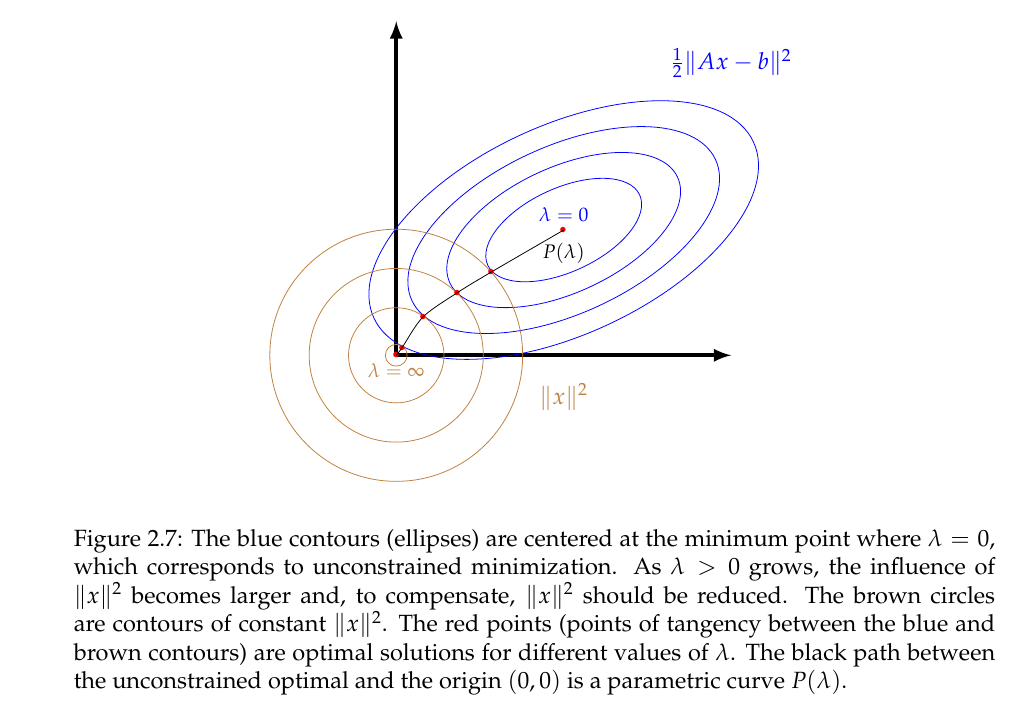

## Ejercicio algebraico.
Hay una relacion muy estrecha entre minimos y sistemas lineales.

Por ejemplo resolver $ax=b$ es lo mismo que hallar el minimo de
$$f(x)= \frac12 a x^2 - bx + c $$
Por que? tomemos la derivada

$$f'(x) = ax - b =  0  \Leftrightarrow  ax = b $$

Hagamos esto en matrices, $A$ es $n \times n$ simetrica

$$f(x) = \frac12 x^T A x - b^T x + c $$

Escribamos esto en indices

$$f(x) = \frac12 \sum_{i=1}^n \sum_{j=1}^n x_i x_j - \sum_{j=1}^n b_j x_j + c $$

\begin{eqnarray}
\frac{\partial f}{\partial x_k} &=& \frac12 \sum_{i=1}^n \sum_{j=1}^n a_{ij} \delta_{ik} x_j + \frac12 \sum_{i=1}^n \sum_{j=1}^n a_{ij} x_i \delta_{jk} - \sum_{j=1}^n b_j \delta_{kj} \\
&=& \frac12 \sum_{j=1}^n a_{kj} x_j + \frac12 \sum_{i=1}^n a_{ik} x_i - b_k  \text{como $A$ es simetrica} \\
&=& \sum_{j=1}^n a_{kj} x_j - b_k \\
= (A x)_k - (b)_k
\end{eqnarray}
con $k=1,2, \cdots, n$
en forma matricial

$$\nabla f = Ax - b $$
que $\nabla f = 0$ es equivalente a
$Ax = b$.
